In [ ]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/cats_dogs.zip

Archive:  /content/drive/MyDrive/cats_dogs.zip
   creating: test/
   creating: test/test/
  inflating: test/test/dog_barking_112.wav  
  inflating: test/test/dog_barking_99.wav  
  inflating: test/test/dog_barking_91.wav  
  inflating: test/test/dog_barking_90.wav  
  inflating: test/test/dog_barking_89.wav  
  inflating: test/test/dog_barking_82.wav  
  inflating: test/test/dog_barking_78.wav  
  inflating: test/test/dog_barking_73.wav  
  inflating: test/test/dog_barking_66.wav  
  inflating: test/test/dog_barking_64.wav  
  inflating: test/test/dog_barking_62.wav  
  inflating: test/test/dog_barking_59.wav  
  inflating: test/test/dog_barking_54.wav  
  inflating: test/test/dog_barking_49.wav  
  inflating: test/test/dog_barking_48.wav  
  inflating: test/test/dog_barking_46.wav  
  inflating: test/test/dog_barking_45.wav  
  inflating: test/test/dog_barking_44.wav  
  inflating: test/test/dog_barking_43.wav  
  inflating: test/test/dog_barking_34.wav  
  inflating: test/test/dog_ba

In [ ]:
filepath = '/content/test/cats/cat_110.wav'
ipd.Audio(filepath)

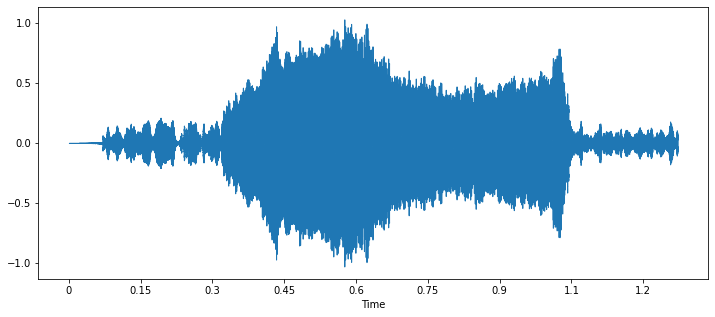

In [ ]:
import librosa
import librosa.display
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

16000
[   0    0    0 ... 1521 1327 1918]


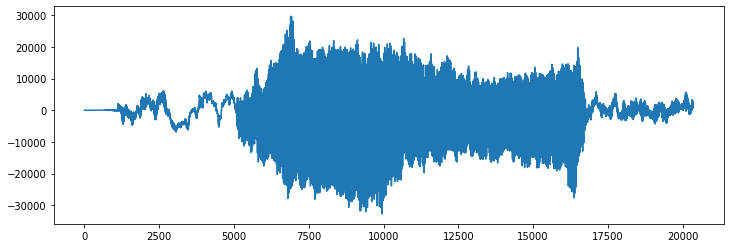

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filepath)
print(wave_sample_rate)
print(wave_audio)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [ ]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 55)
[[-5.8438989e+02 -5.7206903e+02 -3.8243494e+02 ... -3.0544571e+02
  -3.0878412e+02 -2.7889658e+02]
 [ 0.0000000e+00  8.5084209e+00  9.9536293e+01 ...  1.1691802e+02
   1.1487750e+02  7.8564186e+01]
 [ 0.0000000e+00  5.0022912e-01 -1.9194160e+01 ... -1.2189903e+01
  -1.4567881e+01  4.2115861e-01]
 ...
 [ 0.0000000e+00 -6.0198069e+00 -4.5397029e+00 ... -2.8461099e-01
   1.9561131e+00  1.0544217e+00]
 [ 0.0000000e+00 -1.7156348e+00 -1.0038865e+01 ... -1.2287771e+01
  -9.5318499e+00 -3.1140065e+00]
 [ 0.0000000e+00  2.3496988e+00  2.3682048e+00 ...  1.2614557e+01
   7.0527382e+00  3.0356469e+00]]


In [ ]:
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    scaled_features = np.mean(features.T,axis=0)
    return scaled_features

In [ ]:
import pandas as pd
metadata = pd.read_csv('/content/drive/MyDrive/train_test_split.csv')

In [ ]:
audio_dataset_path = "/content/drive/MyDrive/train"

In [ ]:
import os

#my_file = 'test_file.txt'

def move_file(file_name, source_dir, dest_dir):
  # Create full file path for source
  source_path = os.path.join(source_dir, file_name)
  # Create full file path for destination
  dest_path = os.path.join(dest_dir, file_name)

  # Move file
  os.rename(source_path, dest_path)

# Calling function to move our file
#move_file(my_file, PATH_SOURCE_DIR, PATH_DEST_DIR)

In [ ]:
# Define Paths for Source and Destination Folders
PATH_SOURCE_DIR = '/content/test/cats' 
# Example: /media/projects/source_folder

PATH_DEST_DIR = '/content/train/cat' 
# Example: /media/projects/dest_folder

In [ ]:
for file in os.listdir(PATH_SOURCE_DIR):
  move_file(file, PATH_SOURCE_DIR, PATH_DEST_DIR)

In [ ]:
# Define Paths for Source and Destination Folders
PATH_SOURCE_DIR = '/content/test/test' 
# Example: /media/projects/source_folder

PATH_DEST_DIR = '/content/train/dog' 
# Example: /media/projects/dest_folder

In [ ]:
for file in os.listdir(PATH_SOURCE_DIR):
  move_file(file, PATH_SOURCE_DIR, PATH_DEST_DIR)

In [ ]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath("train"),'fold'+str(row["fold"])+'//',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

276it [00:25, 10.74it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature class
0  [-236.90105, 146.71846, -99.31378, -0.44166172...   CAT
1  [-152.19452, 84.71567, -136.02187, 23.301334, ...   CAT
2  [-316.23047, 126.03266, -4.8289766, -13.919552...   CAT
3  [-287.6777, 92.18603, -30.633978, 6.949423, -3...   CAT
4  [-273.62192, 72.511024, -52.122425, 80.86784, ...   CAT

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
### Label Encoding -> Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
num_labels=y.shape[1]

In [ ]:
model=Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

model.fit(X_train, y_train, batch_size=15, epochs=100, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
15/15 [==============================] - 1s 23ms/step - loss: 23.5247 - accuracy: 0.4545 - val_loss: 3.0248 - val_accuracy: 0.4821
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 15.2787 - accuracy: 0.5182 - val_loss: 0.4865 - val_accuracy: 0.8750
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 10.3885 - accuracy: 0.5636 - val_loss: 0.3959 - val_accuracy: 0.8571
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 11.7777 - accuracy: 0.5682 - val_loss: 0.4594 - val_accuracy: 0.8571
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 8.5268 - accuracy: 0.6273 - val_loss: 0.9468 - val_accuracy: 0.6786
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 7.6413 - accuracy: 0.5682 - val_loss: 0.2429 - val_accuracy: 0.9107
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 5.7503 - accuracy: 0.6000 - val_loss: 0.2351 - val_accuracy: 0.9107
Epoch 8/

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

2/2 [==============================] - 0s 7ms/step
[0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1]


In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9107142686843872


In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)